In [14]:
from Functions import *

In [15]:
# investigate data
data = pd.read_csv(r'C:\Users\Nick\Downloads\Traffic_Crashes_-_Crashes.csv')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453326 entries, 0 to 453325
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                453326 non-null  object 
 1   RD_NO                          449745 non-null  object 
 2   CRASH_DATE_EST_I               33708 non-null   object 
 3   CRASH_DATE                     453326 non-null  object 
 4   POSTED_SPEED_LIMIT             453326 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         453326 non-null  object 
 6   DEVICE_CONDITION               453326 non-null  object 
 7   WEATHER_CONDITION              453326 non-null  object 
 8   LIGHTING_CONDITION             453326 non-null  object 
 9   FIRST_CRASH_TYPE               453326 non-null  object 
 10  TRAFFICWAY_TYPE                453326 non-null  object 
 11  LANE_CNT                       198959 non-null  float64
 12  ALIGNMENT                     

In [6]:
data_ = data.drop(['RD_NO', 'CRASH_DATE_EST_I','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION','FIRST_CRASH_TYPE','TRAFFICWAY_TYPE','LANE_CNT','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','REPORT_TYPE','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','DATE_POLICE_NOTIFIED','SEC_CONTRIBUTORY_CAUSE','STREET_NO','STREET_DIRECTION','STREET_NAME','BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','NUM_UNITS','INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','LOCATION','INTERSECTION_RELATED_I'], axis=1)
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453326 entries, 0 to 453325
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CRASH_RECORD_ID              453326 non-null  object 
 1   CRASH_DATE                   453326 non-null  object 
 2   POSTED_SPEED_LIMIT           453326 non-null  int64  
 3   WEATHER_CONDITION            453326 non-null  object 
 4   LIGHTING_CONDITION           453326 non-null  object 
 5   CRASH_TYPE                   453326 non-null  object 
 6   DAMAGE                       453326 non-null  object 
 7   PRIM_CONTRIBUTORY_CAUSE      453326 non-null  object 
 8   MOST_SEVERE_INJURY           452423 non-null  object 
 9   INJURIES_TOTAL               452433 non-null  float64
 10  INJURIES_FATAL               452433 non-null  float64
 11  INJURIES_INCAPACITATING      452433 non-null  float64
 12  INJURIES_NON_INCAPACITATING  452433 non-null  float64
 13 

In [7]:
# drop ambiguous or null data
data_.drop(data_[data_['WEATHER_CONDITION'] == 'UNKNOWN'].index, inplace = True)
data_.drop(data_[data_['WEATHER_CONDITION'] == 'OTHER'].index, inplace = True)
data_.drop(data_[data_['PRIM_CONTRIBUTORY_CAUSE'] == 'UNABLE TO DETERMINE'].index, inplace = True)
data_.drop(data_[data_['PRIM_CONTRIBUTORY_CAUSE'] == 'NOT APPLICABLE'].index, inplace = True)
data_.drop(data_[data_['LIGHTING_CONDITION'] == 'UNKNOWN'].index, inplace = True)

_data_ = data_.dropna()
_data_.isna().sum()
_data_.head()
_data_['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO YIELD RIGHT-OF-WAY                                                       49192
FOLLOWING TOO CLOSELY                                                               47522
IMPROPER OVERTAKING/PASSING                                                         20885
IMPROPER BACKING                                                                    19165
FAILING TO REDUCE SPEED TO AVOID CRASH                                              18742
IMPROPER LANE USAGE                                                                 17159
IMPROPER TURNING/NO SIGNAL                                                          14714
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                 13570
DISREGARDING TRAFFIC SIGNALS                                                         7854
WEATHER                                                                              6692
OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER     5365
DISREGARDI

In [8]:
# clean primary contributing factors column, placing each in 1 of 4 categories
_data_['PRIM_CONTRIBUTORY_CAUSE'] = _data_['PRIM_CONTRIBUTORY_CAUSE'].replace(['FAILING TO YIELD RIGHT-OF-WAY','FOLLOWING TOO CLOSELY','NOT APPLICABLE','IMPROPER OVERTAKING/PASSING','IMPROPER BACKING','FAILING TO REDUCE SPEED TO AVOID CRASH','IMPROPER LANE USAGE','IMPROPER TURNING/NO SIGNALDRIVING SKILLS/KNOWLEDGE/EXPERIENCE','DISREGARDING TRAFFIC SIGNALS','IMPROPER TURNING/NO SIGNAL','DRIVING SKILLS/KNOWLEDGE/EXPERIENCE','OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER','DISREGARDING STOP SIGN','DRIVING ON WRONG SIDE/WRONG WAY','EXCEEDING AUTHORIZED SPEED LIMIT','EXCEEDING SAFE SPEED FOR CONDITIONS'],'DRIVER NEGLIGENCE')
_data_['PRIM_CONTRIBUTORY_CAUSE'] = _data_['PRIM_CONTRIBUTORY_CAUSE'].replace(['WEATHER','VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)','DISTRACTION - FROM OUTSIDE VEHICLE','EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST','ANIMAL','EQUIPMENT - VEHICLE CONDITION','ROAD ENGINEERING/SURFACE/MARKING DEFECTS','ROAD CONSTRUCTION/MAINTENANCE'],'EXTERNAL FACTORS')
_data_['PRIM_CONTRIBUTORY_CAUSE'] = _data_['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISTRACTION - FROM INSIDE VEHICLE','CELL PHONE USE OTHER THAN TEXTING','DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)','TEXTING'],'DISTRACTION')
_data_['PRIM_CONTRIBUTORY_CAUSE'] = _data_['PRIM_CONTRIBUTORY_CAUSE'].replace(['PHYSICAL CONDITION OF DRIVER','UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)','HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)','DISREGARDING OTHER TRAFFIC SIGNS','DISREGARDING ROAD MARKINGS','TURNING RIGHT ON RED','DISREGARDING YIELD SIGN','RELATED TO BUS STOP','PASSING STOPPED SCHOOL BUS','BICYCLE ADVANCING LEGALLY ON RED LIGHT','OBSTRUCTED CROSSWALKS','MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT'],'INTOXICATION')

In [9]:
# group weather data into similar categories
_data_['WEATHER_CONDITION'] = _data_['WEATHER_CONDITION'].replace(['BLOWING SNOW','SLEET/HAIL'],'SNOW')
_data_['WEATHER_CONDITION'] = _data_['WEATHER_CONDITION'].replace(['FREEZING RAIN/DRIZZLE'],'RAIN')
_data_ = _data_[(_data_['WEATHER_CONDITION'] != 'SEVERE CROSS WIND GATE') & (_data_['WEATHER_CONDITION'] != 'BLOWING SAND, SOIL, DIRT')]
_data_ = _data_[(_data_['WEATHER_CONDITION'] != 'UNKNOWN') & (_data_['WEATHER_CONDITION'] != 'OTHER')]
_data_['WEATHER_CONDITION'].value_counts()

CLEAR              208033
RAIN                26130
SNOW                10547
CLOUDY/OVERCAST      8790
FOG/SMOKE/HAZE        514
Name: WEATHER_CONDITION, dtype: int64

In [10]:
# categorize injuries column
_data_['INJURIES'] = _data_['MOST_SEVERE_INJURY'].copy()
_data_['INJURIES'] = _data_['INJURIES'].replace(['NONINCAPACITATING INJURY','REPORTED, NOT EVIDENT'],'MINOR INJURY')
_data_['INJURIES'] = _data_['INJURIES'].replace(['NO INDICATION OF INJURY'],'NO INJURY')

_data_.to_csv('cleaned_data.csv')
_data_.head()

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,WEATHER_CONDITION,LIGHTING_CONDITION,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,INJURIES
2,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,06/30/2017 04:00:00 PM,35,CLEAR,DAYLIGHT,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",DRIVER NEGLIGENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,16,6,6,41.741804,-87.740954,NO INJURY
6,0209e21f298984f7375742b7ef27c9880b485f41123a12...,08/30/2018 05:45:00 PM,30,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER NEGLIGENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,17,5,8,41.903825,-87.643286,NO INJURY
8,02e2ed3606a50dda185f5e97c57a45552087d6fbea1c4b...,05/09/2018 11:30:00 AM,25,RAIN,DAYLIGHT,NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER NEGLIGENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,11,4,5,41.721290,-87.628510,NO INJURY
11,046c0f96fdf5f7384e026821bb23fdd56d610dce11247b...,01/24/2019 06:45:00 AM,30,CLEAR,"DARKNESS, LIGHTED ROAD",NO INJURY / DRIVE AWAY,"OVER $1,500",DRIVER NEGLIGENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,6,5,1,41.794779,-87.623828,NO INJURY
12,04f6245394966ed41b109ac46b18ed45b8b90c6607cebc...,05/10/2018 06:00:00 PM,30,CLEAR,DAYLIGHT,NO INJURY / DRIVE AWAY,"$501 - $1,500",DRIVER NEGLIGENCE,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,18,5,5,41.907777,-87.634531,NO INJURY


In [11]:
not_speed_limits = [0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 14, 18, 22, 23, 24, 26, 29, 31, 32, 33, 34, 36, 38, 39, 49, 63, 65, 99]
data_speeds_cleaned = _data_[~_data_['POSTED_SPEED_LIMIT'].isin(not_speed_limits)]
speeds = _data_['POSTED_SPEED_LIMIT'].value_counts().index.tolist()
print('speeds:' + str(sorted(speeds)))

data_speeds_cleaned['POSTED_SPEED_LIMIT'].value_counts().sort_index()
data_speeds_cleaned['DAMAGE'] = data_speeds_cleaned['DAMAGE'].replace(['$501 - $1,500'],'$500-$1500')

data_speeds_cleaned['POSTED_SPEED_LIMIT'].value_counts()

speeds:[0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 15, 20, 24, 25, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 45, 49, 50, 55, 60, 63, 65, 70, 99]


30    192935
35     18977
25     13301
20      7838
15      7583
10      3785
40      2801
45      1774
5       1521
55       209
50        57
60        13
70         2
Name: POSTED_SPEED_LIMIT, dtype: int64

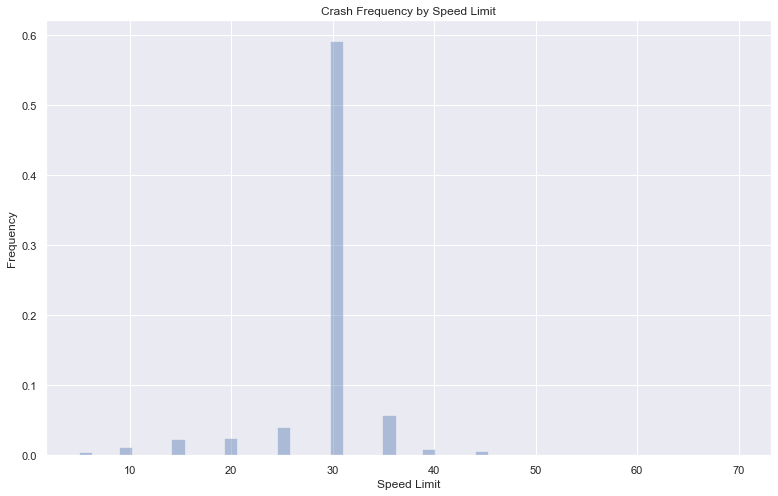

In [91]:
sns.distplot(data_speeds_cleaned['POSTED_SPEED_LIMIT'])
sns.set(rc={'figure.figsize':(13,8)})
plt.title('Crash Frequency by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Frequency');

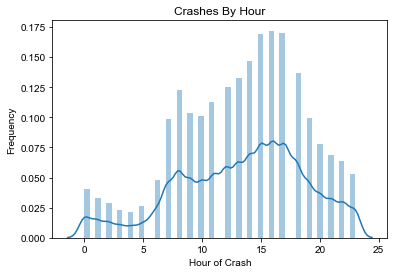

In [13]:
sns.distplot(_data_['CRASH_HOUR'])
sns.set(rc={'figure.figsize':(13,8)})
plt.title('Crashes By Hour')
plt.xlabel('Hour of Crash')
plt.ylabel('Frequency');

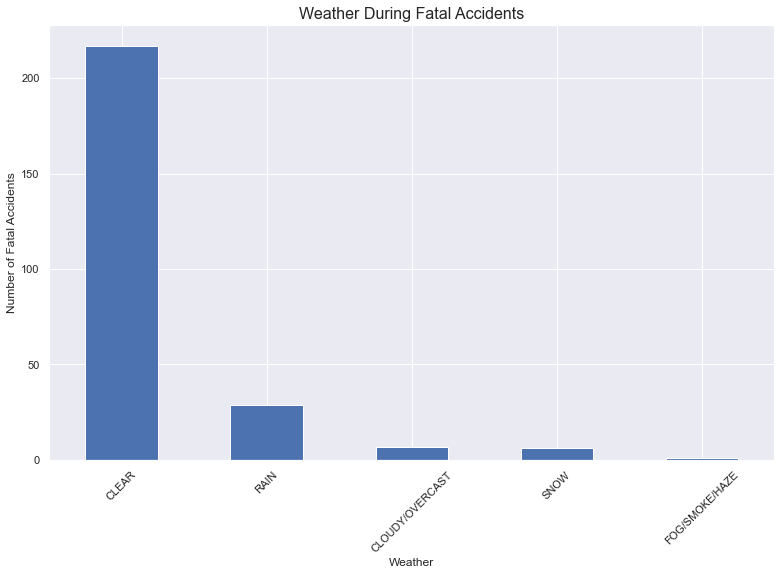

<Figure size 1512x936 with 0 Axes>

In [14]:
df1 = data_speeds_cleaned.groupby(['INJURIES'])
df_fatal = df1.get_group('FATAL')
pd.value_counts(df_fatal['WEATHER_CONDITION']).plot.bar();
plt.title('Weather During Fatal Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
plt.figure(figsize=(21,13))
plt.show()

In [15]:
(df_fatal['WEATHER_CONDITION']).value_counts()

CLEAR              217
RAIN                29
CLOUDY/OVERCAST      7
SNOW                 6
FOG/SMOKE/HAZE       1
Name: WEATHER_CONDITION, dtype: int64

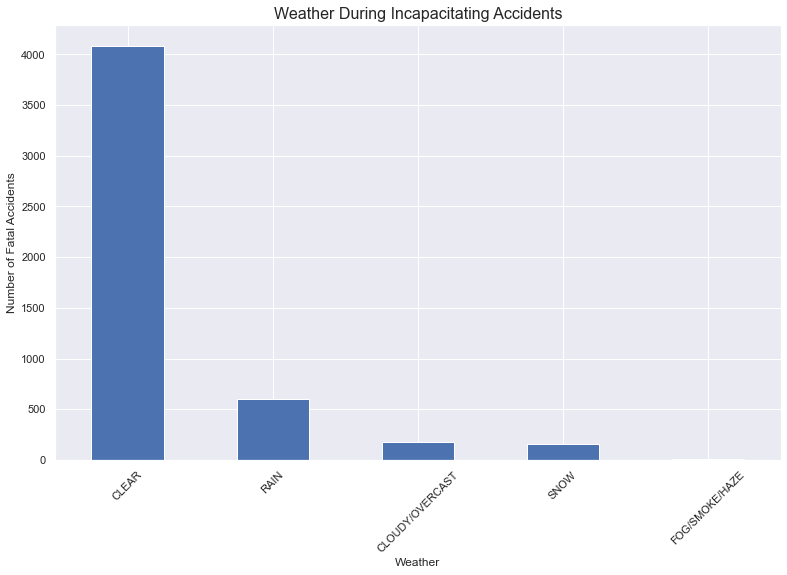

In [16]:
df_incapacitating = df1.get_group('INCAPACITATING INJURY')
pd.value_counts(df_incapacitating['WEATHER_CONDITION']).plot.bar();
plt.title('Weather During Incapacitating Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
plt.show()

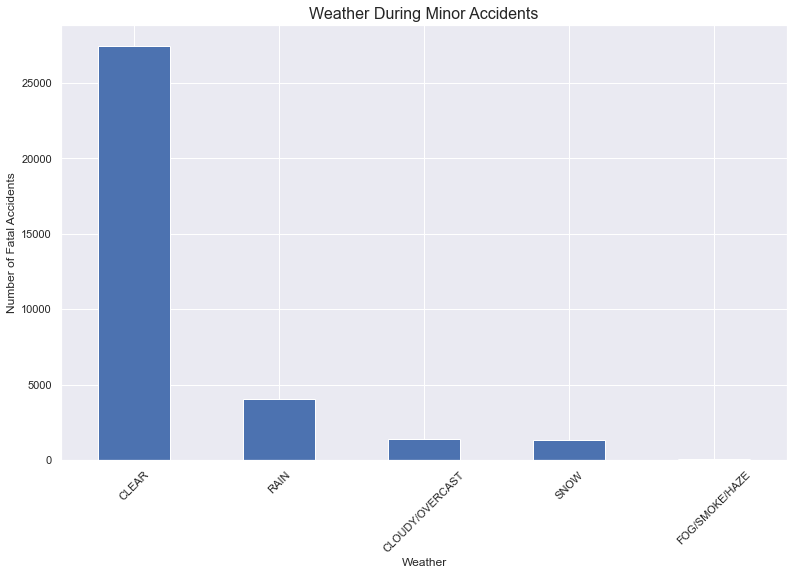

In [17]:
df_minor = df1.get_group('MINOR INJURY')
pd.value_counts(df_minor['WEATHER_CONDITION']).plot.bar();
plt.title('Weather During Minor Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
#plt.ylim(0,5000)
plt.show()

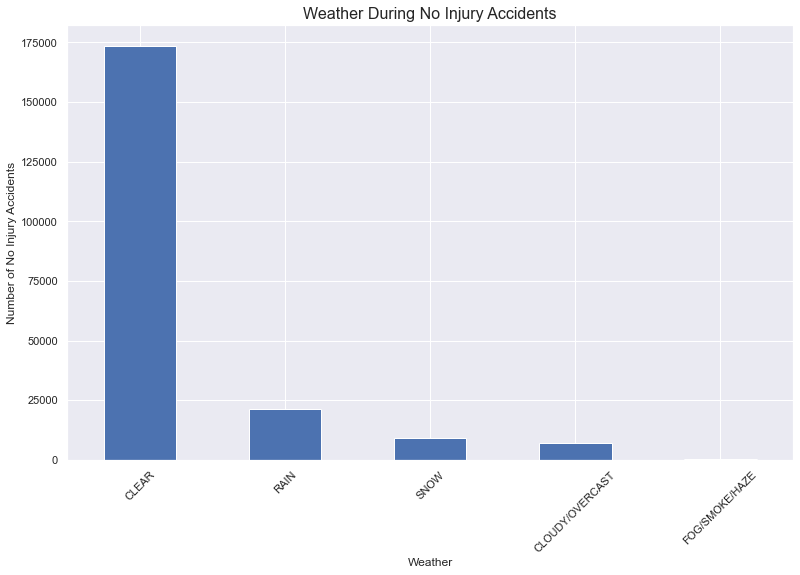

<Figure size 1512x936 with 0 Axes>

In [18]:
df_no_injury = df1.get_group('NO INJURY')
pd.value_counts(df_no_injury['WEATHER_CONDITION']).plot.bar();
plt.title('Weather During No Injury Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Number of No Injury Accidents', fontsize=12)
plt.figure(figsize=(21,13));
plt.show()

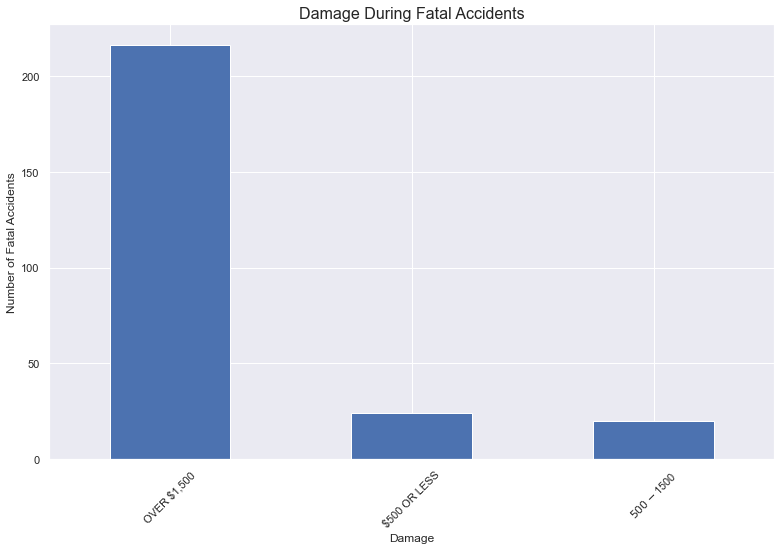

<Figure size 1512x936 with 0 Axes>

In [19]:
df_fatal = df1.get_group('FATAL')
pd.value_counts(df_fatal['DAMAGE']).plot.bar();
plt.title('Damage During Fatal Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Damage', fontsize=12)
plt.ylabel('Number of Fatal Accidents', fontsize=12)
plt.figure(figsize=(21,13));
plt.show()

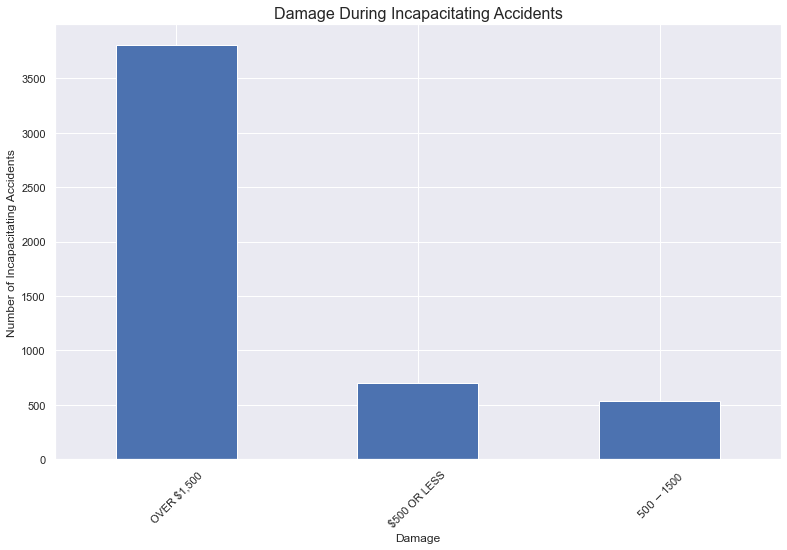

In [20]:
pd.value_counts(df_incapacitating['DAMAGE']).plot.bar();
plt.title('Damage During Incapacitating Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Damage', fontsize=12)
plt.ylabel('Number of Incapacitating Accidents', fontsize=12)
plt.show()

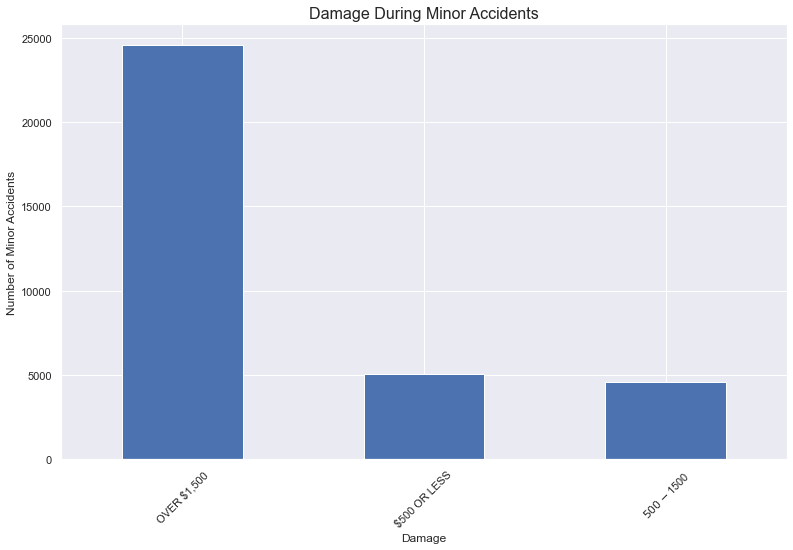

In [21]:
pd.value_counts(df_minor['DAMAGE']).plot.bar();
plt.title('Damage During Minor Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Damage', fontsize=12)
plt.ylabel('Number of Minor Accidents', fontsize=12)
plt.show()

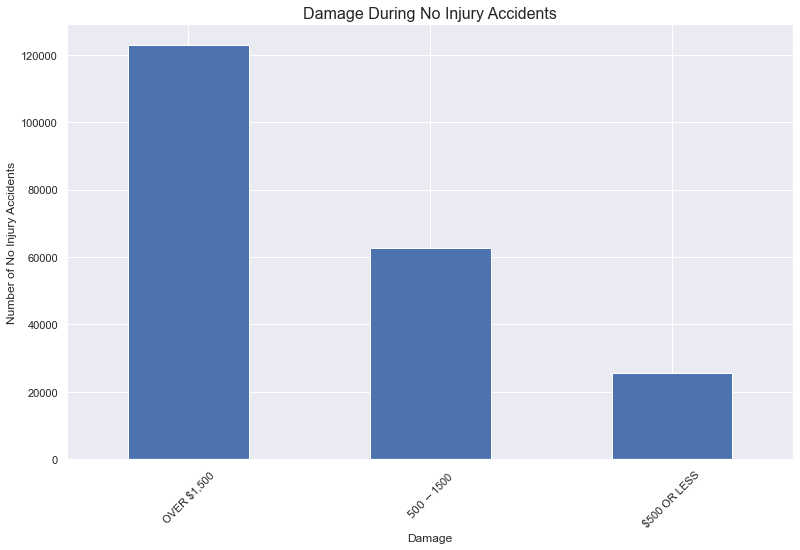

<Figure size 1512x936 with 0 Axes>

In [22]:
pd.value_counts(df_no_injury['DAMAGE']).plot.bar();
plt.title('Damage During No Injury Accidents', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Damage', fontsize=12)
plt.ylabel('Number of No Injury Accidents', fontsize=12)
plt.figure(figsize=(21,13));
plt.show()

In [12]:
# group injuries into 4 distinct categories
data__ = data_speeds_cleaned[['PRIM_CONTRIBUTORY_CAUSE','POSTED_SPEED_LIMIT','WEATHER_CONDITION','LIGHTING_CONDITION','DAMAGE','INJURIES','CRASH_HOUR','CRASH_MONTH']].copy()

data__ = pd.get_dummies(data__, columns=['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'DAMAGE','INJURIES'])

data__['PRIM_CONTRIBUTORY_CAUSE'] = data__['PRIM_CONTRIBUTORY_CAUSE'].replace(['DRIVER NEGLIGENCE'], '0')
data__['PRIM_CONTRIBUTORY_CAUSE'] = data__['PRIM_CONTRIBUTORY_CAUSE'].replace(['EXTERNAL FACTORS'], '1')
data__['PRIM_CONTRIBUTORY_CAUSE'] = data__['PRIM_CONTRIBUTORY_CAUSE'].replace(['INTOXICATION'], '2')
data__['PRIM_CONTRIBUTORY_CAUSE'] = data__['PRIM_CONTRIBUTORY_CAUSE'].replace(['DISTRACTION'], '3')

data__.head()

data__.to_csv('cleaned_dummified_data.csv')

In [13]:
x = data__.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1)
y = data__['PRIM_CONTRIBUTORY_CAUSE']
data__['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

0    221682
1     17185
2      7672
3      4257
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=33)

In [26]:
XGBmodel = XGBClassifier()
XGBmodel.fit(x_train, y_train)
y_predict = XGBmodel.predict(x_test)

In [27]:
parameters_grid = {
    'colsample_bytree': [0.1, 0.5, 0.8, 1],
    'n_estimators': [25],
    'max_depth': [2, 5, 10, 20]}

# Perform grid search
grid_mse = GridSearchCV(estimator=XGBmodel, param_grid=parameters_grid,
                        scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_mse.fit(x, y)

# print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", round(np.sqrt(np.abs(grid_mse.best_score_))), 4)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 13.3min finished


Best parameters found:  {'colsample_bytree': 0.5, 'max_depth': 5, 'n_estimators': 25}
Lowest RMSE found:  1.0 4


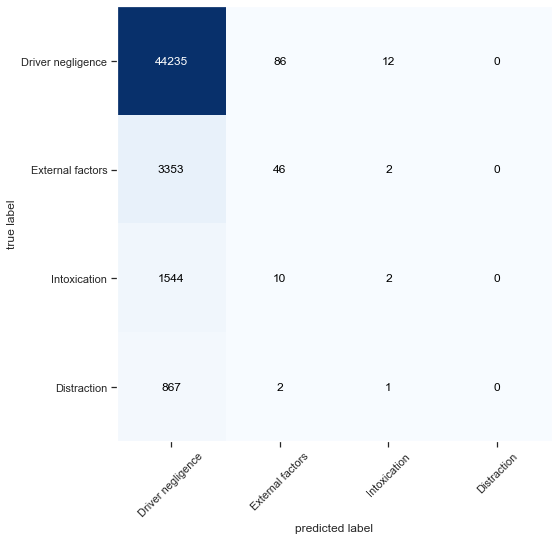

In [28]:
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_predict, 
                      binary=False)

labels = ['Driver negligence','External factors','Intoxication','Distraction']
fig, ax = plot_confusion_matrix(conf_mat=cm)
ax.set_xticklabels([''] + labels,rotation=45)
ax.set_yticklabels([''] + labels)

plt.show()

In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

resampling = SMOTE()

# Define the pipeline, tell it to combine SMOTE with the XGB model
pipeline = Pipeline([('SMOTE', resampling), ('XGBoost', XGBmodel)])

In [31]:
pipeline.fit(x_train, y_train) 
predicted_ = pipeline.predict(x_test)

# Obtain the results from the classification report and confusion matrix 
print('Classification report:\n', classification_report(y_test, predicted_, digits=4))
conf_mat = confusion_matrix(y_target=y_test, y_predicted=predicted_)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0     0.9079    0.6249    0.7403     44333
           1     0.1783    0.3328    0.2322      3401
           2     0.0808    0.3104    0.1283      1556
           3     0.0193    0.1621    0.0344       870

    accuracy                         0.5873     50160
   macro avg     0.2966    0.3576    0.2838     50160
weighted avg     0.8173    0.5873    0.6746     50160

Confusion matrix:
 [[27703  4985  5013  6632]
 [ 1584  1132   329   356]
 [  733   149   483   191]
 [  494    84   151   141]]


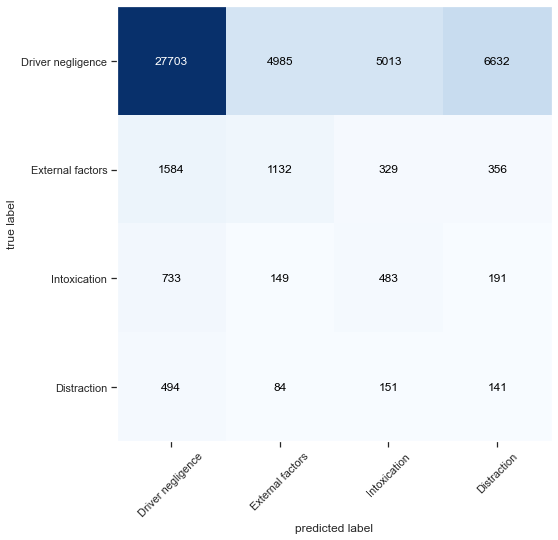

In [32]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
ax.set_xticklabels([''] + labels,rotation=45)
ax.set_yticklabels([''] + labels)

plt.show()

In [33]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(random_state=33)))
models.append(('XGB', XGBClassifier(random_state=33))) 

LR: 0.8839 (0.0020)
LDA: 0.8682 (0.0025)
KNN: 0.8788 (0.0020)
DT: 0.8700 (0.0023)
RF: 0.8738 (0.0018)
XGB: 0.8834 (0.0020)


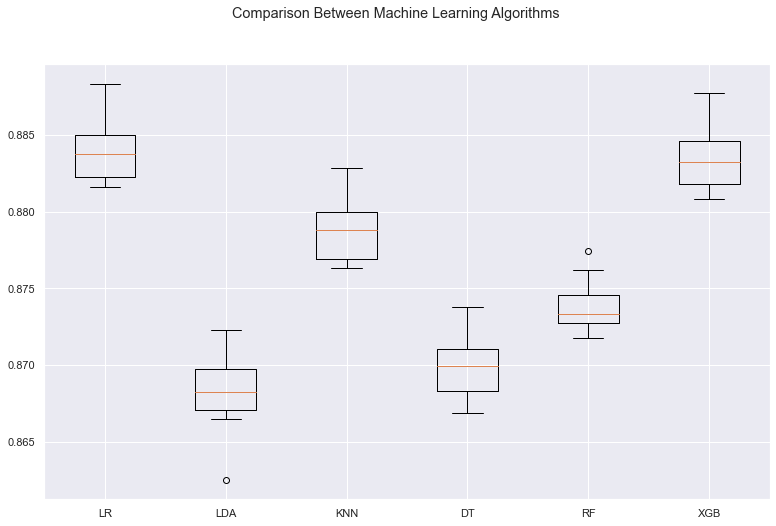

In [34]:
#evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=33)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %0.4f (%0.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison Between Machine Learning Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
# initialize the classificators using the random state for reproducibility
logreg = LogisticRegression()
tree= DecisionTreeClassifier(random_state=33) 
forest= RandomForestClassifier(random_state=33)
knn= KNeighborsClassifier()
xboost= XGBClassifier(random_state=33)

models= [logreg, tree, forest, knn, xboost]

# create a classification report for each model
for model in models:
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    accuracy= accuracy_score(y_test, y_pred)
    clf_report= classification_report(y_test, y_pred, digits=4)
    print(f"The accuracy of model {type(model).__name__} is {accuracy:.4f}")
    print(clf_report)
    print("\n")

The accuracy of model LogisticRegression is 0.8837
              precision    recall  f1-score   support

           0     0.8839    0.9997    0.9383     44333
           1     0.3333    0.0018    0.0035      3401
           2     0.0000    0.0000    0.0000      1556
           3     0.0000    0.0000    0.0000       870

    accuracy                         0.8837     50160
   macro avg     0.3043    0.2504    0.2354     50160
weighted avg     0.8038    0.8837    0.8295     50160



The accuracy of model DecisionTreeClassifier is 0.8706
              precision    recall  f1-score   support

           0     0.8866    0.9810    0.9314     44333
           1     0.2043    0.0479    0.0776      3401
           2     0.0691    0.0109    0.0189      1556
           3     0.0000    0.0000    0.0000       870

    accuracy                         0.8706     50160
   macro avg     0.2900    0.2600    0.2570     50160
weighted avg     0.7996    0.8706    0.8291     50160



The accuracy of mode

In [50]:
data_speeds_cleaned['CRASH_DATE'] = pd.to_datetime(data_speeds_cleaned['CRASH_DATE'])

print(data_speeds_cleaned.groupby(data_speeds_cleaned['CRASH_DATE'].dt.year).count())

            CRASH_RECORD_ID  CRASH_DATE  POSTED_SPEED_LIMIT  \
CRASH_DATE                                                    
2013                      1           1                   1   
2014                      2           2                   2   
2015                   5157        5157                5157   
2016                  23114       23114               23114   
2017                  46755       46755               46755   
2018                  68286       68286               68286   
2019                  65106       65106               65106   
2020                  42375       42375               42375   

            WEATHER_CONDITION  LIGHTING_CONDITION  CRASH_TYPE  DAMAGE  \
CRASH_DATE                                                              
2013                        1                   1           1       1   
2014                        2                   2           2       2   
2015                     5157                5157        5157    5157   
2016

In [37]:
final_daylight_ = pd.read_pickle("final_daylight.pkl")

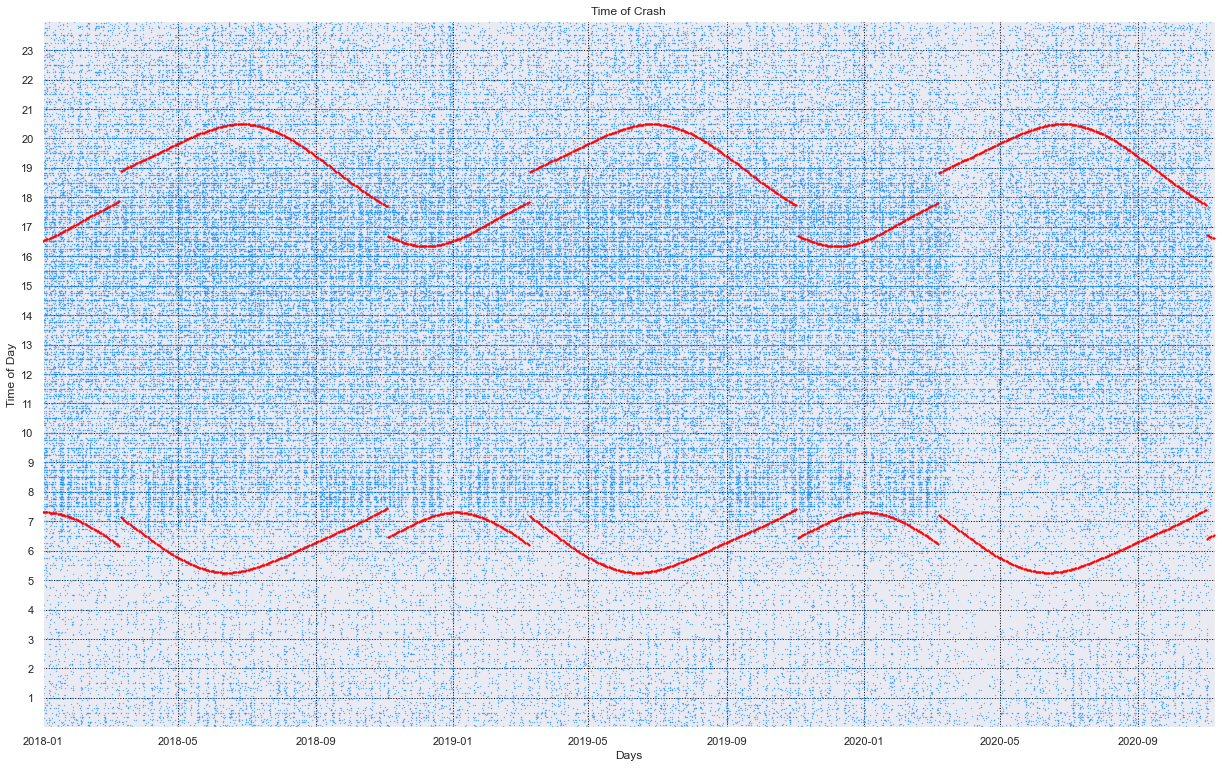

In [53]:
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(21,13))

plt.scatter(final_daylight_['days'],final_daylight_['sunrise'].dt.hour+((final_daylight_['sunrise'].dt.minute)/(60)),s=1.5,color='red',zorder=4)
plt.scatter(final_daylight_['days'],final_daylight_['sunset'].dt.hour+((final_daylight_['sunset'].dt.minute)/(60)),s=1.5,color='red',zorder=4)
plt.scatter(data_speeds_cleaned['CRASH_DATE'].dt.date, data_speeds_cleaned['CRASH_HOUR'] + ((data_speeds_cleaned['CRASH_DATE'].dt.minute)/(60)), s=0.35,marker='.', color='springgreen', edgecolors='dodgerblue', alpha=1)
plt.ylim(0,24)
#plt.xlim([datetime.date(2019, 1, 1), datetime.date(2020, 11, 1)])
plt.xlim([datetime.date(2018, 1, 1), datetime.date(2020, 11, 8)])
#plt.xticks([datetime(2018,_,1).strftime('%M') for _ in range(1,13)])
plt.yticks(ticks=range(1,24))
plt.grid(linestyle='dotted', color='black', zorder=3)
plt.title('Time of Crash')
plt.xlabel('Days')
plt.ylabel('Time of Day')
plt.show()